### Descente de gradient en mode *batch*

La version *batch* consiste à mettre à jour la valeur de $\theta$ avec le gradient calculé sur l'ensemble des exemples. L'algorithme s'écrit :

Répéter jusqu'à convergence:

$$\theta_j := \theta_j + \frac{\alpha}{m} \sum_{i=1}^{m}(y^{(j)}-h_\theta(x^{(j)}))x^{(j)}_i$$

On peut implémenter l'algorithme *batch* de la façon suivante :

In [7]:
def batch_update(theta, X, Y, alpha=0.01):
    derivative = zeros_like(theta)
    m, n = X.shape
    for j in range(n):
        for i in range(m):
            derivative[j] += alpha * (Y[i] - h(theta, X[i,:])) * X[i,j]
    return theta + 1./m*derivative

Il est possible de réécrire cet algorithme de façon plus concise et plus efficice en utilisant une représentation matricielle :
$$\theta_j := \theta_j + \frac{\alpha}{m} (Y-X^T\theta) X$$

In [8]:
def batch_update(theta, X, Y, alpha=0.01):
    m, _ = X.shape
    # return theta + (alpha/m) * (Y - X.dot(theta)).dot(X)
    return theta + (alpha/m) * (Y - X @ theta) @ X

### Descente de gradient stochastique

Il est également possible d'utiliser une version stochastique de la descente de gradient. Dans ce cas l'algorithme est mis à jour après chaque exemple, ce qui accèlere considérablement la convergence. Cependant l'algorithme *batch* converge de façon certaine vers l'optimum, qui est unique et global dans notre cas, alors que la version stochastique ne permet que de s'en approcher. L'algorithme stochastique s'écrit:

Répéter jusqu'à convergence:

Pour $i$ de 1 à $m$:

$\theta_j := \theta_j + \alpha (y^{(i)} - h_\theta (x^{(i)}) ) x^{(i)}_j $

In [9]:
def stochastic_update(theta, X, Y, alpha=0.01):
    new_theta = theta.copy()
    m = X.shape[0]
    for i in range(m):
        new_theta += alpha * (Y[i] - X[i,:] @ theta) * X[i,:]
    return new_theta

Une version qui utilise les idiomes Python ressemblerait à :

In [10]:
def stochastic_update(theta, X, Y, alpha=0.01):
    new_theta = theta.copy()
    m = X.shape[0]
    for (x_i, y_i) in zip(X,Y):
        new_theta += alpha * (y_i - x_i @ theta) * x_i
    return new_theta

### Solution explicite des moindres carrés

Il est également possible de dériver directement une solution qui minimise les moindres carrés:

\begin{equation}
\begin{split}
\nabla_\theta J(\theta) & = \nabla_\theta \frac{1}{2}(X\theta - y)^T(X\theta - y)\\
& = X^T X \theta - X^T y
\end{split}
\end{equation}

Pour trouver le minimum, on cherche le point om la dérivée s'annule:

$$ X^T X \theta = X^T y$$

et on ferme l'équation pour obtenir la valeur de $\theta$ qui minimise $J(\theta)$:

$$ \theta = (X^T X)^{-1} X^T y $$

Il est ainsi possible de calculer directement la valeur optimale de $\theta$ sans avoir besoin d'itérer une descente de gradient. Par contre cette solution requiert l'inversion d'une matrice, ce qui n'est envisageable que si la taille de $X$ est raisonnable (pas plus d'un millier d'échantillon). L'algorithme est le suivant:

In [11]:
def normal_equation(X, Y):
    # return pinv(X.T.dot(X)).dot(X.T).dot(Y)
    return pinv(X.T @ X) @ X.T @ Y

### Visualisation de la descente du gradient

Nous allons maintenant voir la forme du gradient. Pour cela, nous allons calculer la valeur de $J(\theta)$ pour différents $\theta$ et afficher le résultat. Les valeurs de $\theta_0$ sont en abscisse et les valeurs de $\theta_1$ en ordonnée, le plan est coloré en fonction de la valeur de $J(\theta)$. Comme $J(\theta)$ est l'erreur quadratique, il y a un minimum global, qui est indiqué par un point en noir, c'est la valeur trouvée par notre descente de gradient.

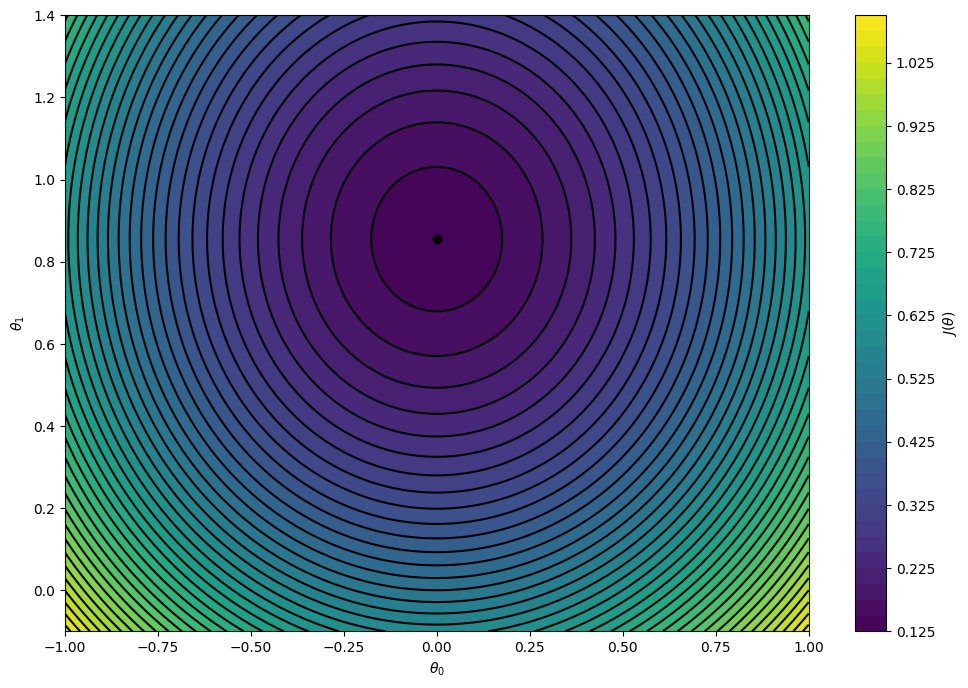

In [22]:
theta0_vals = linspace(-1, 1, 100)
theta1_vals = linspace(-0.1, 1.4, 100)
J_vals = zeros(shape=(theta0_vals.size, theta1_vals.size))
for t1, theta0 in enumerate(theta0_vals):
    for t2, theta1 in enumerate(theta1_vals):
        J_vals[t1, t2] = J(array([theta0, theta1]), X, Y)
J_vals = J_vals.T

def plot_gradient(theta0_vals, theta1_vals, Z):
    levels = logspace(2, 8, 40)
    plt.set_cmap(cm.viridis)
    plt.contourf(theta0_vals, theta1_vals, Z, 40)
    cbar = plt.colorbar()
    cbar.set_label(r'$J(\theta)$')
    v = plt.axis()
    plt.contour(theta0_vals, theta1_vals, Z, 40, colors='k')
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')

plt.rcParams["figure.figsize"]=[12., 8.]
plot_gradient(theta0_vals, theta1_vals, J_vals)
_ = plt.scatter(theta_stoch[0], theta_stoch[1], c='k')

Il est possible de visualiser la descente de gradient en affichant le point de démarrage de l'algorithme $\theta = (0,0)$ avec un point noir et de tracer les points qui indiquent les valeurs prises successivement par $\theta$ au fur et à mesure des itérations. Regardons comment l'algorithme de descente de gradient *batch* converge:

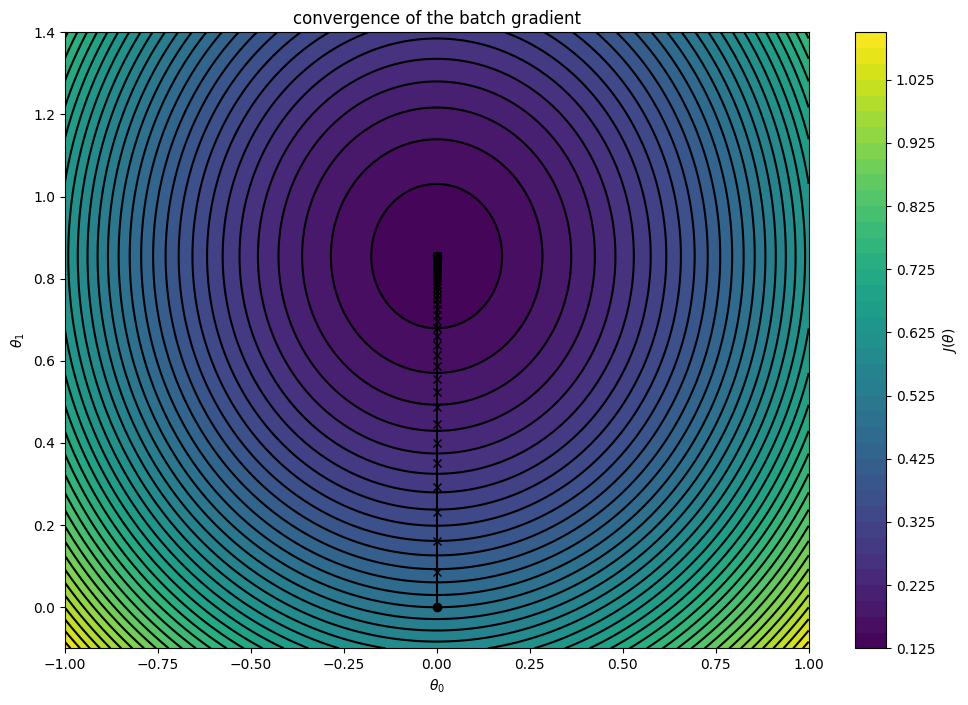

In [24]:
plot_gradient(theta0_vals, theta1_vals, J_vals)

alpha = 0.1
iteration = 1000
t_batch = zeros(shape=(iteration, 2))
for i in range(iteration):
    t_batch[i,:] = batch_update(t_batch[i-1,:], X, Y, alpha)
plt.plot([0, 0], t_batch[-1,:], c='k')
plt.plot(t_batch[:,0], t_batch[:,1], 'xk')
plt.scatter(0, 0, c='k')
plt.scatter(t_batch[-1,0], t_batch[-1,1], c='k')
_ = plt.title('convergence of the batch gradient')

Comparons maintenant avec l'algorithme de descente de gradient stochastique. On voit que la convergence est beaucoup plus rapide : le gradient "saute" beaucoup plus vite vers le centre bien que la valeur de $\alpha$ soit identique en *batch* et en stochastique.

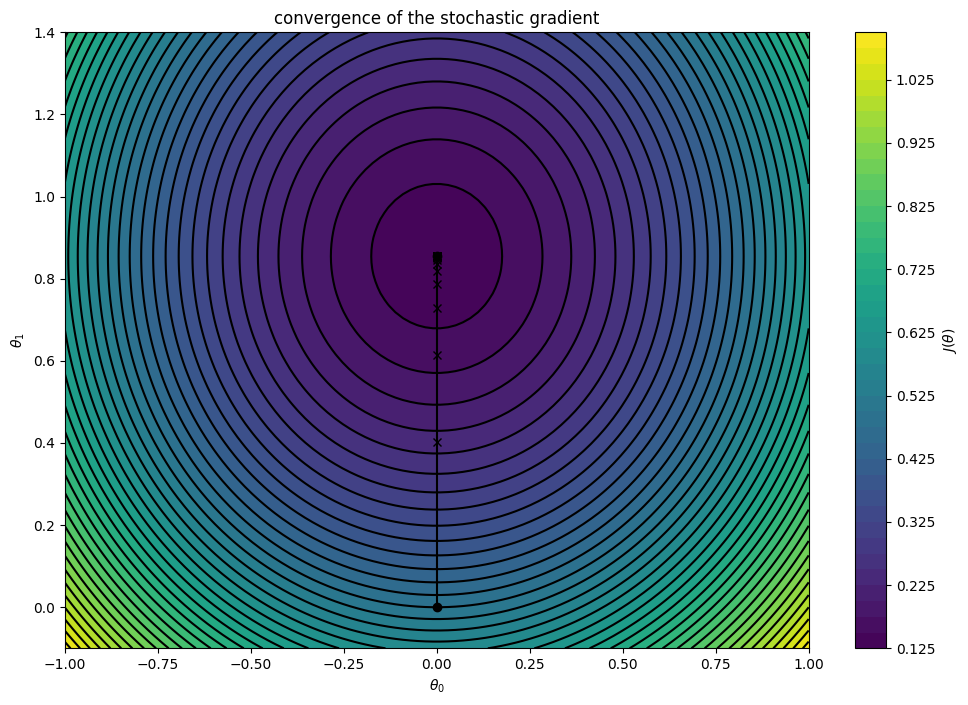

In [25]:
plot_gradient(theta0_vals, theta1_vals, J_vals)

alpha = 0.01
iteration = 1000
t_stoch = zeros(shape=(iteration, 2))
for i in range(iteration):
    t_stoch[i,:] = stochastic_update(t_stoch[i-1,:], X, Y, alpha)
plt.plot([0, 0], t_batch[-1,:], c='k')
plt.plot(t_stoch[:,0], t_stoch[:,1], 'xk')
plt.scatter(0, 0, c='k')
plt.scatter(t_stoch[-1,0], t_stoch[-1,1], c='k')
_ = plt.title('convergence of the stochastic gradient')

## Un maximum d'efficacité avec scikit-learn

Il n'est pas nécessaire de réinventer la roue, tous les algorithmes que nous avons vu ont été implémentés et vérifiés par une large communauté de programmeurs. C'est même la devise de Python, "Batteries included", car il y a des bibliothèques pour tous les problèmes possibles.

Nous allons regarder comment utiliser ces algorithmes avec la bibliothèque scikit-learn (appelée sklearn). Commençons par la régression en utilisant la solution explicite des moindres carrés.

Nous allons utiliser le StandardScaler qui permet de centrer les données et LinearRegression pour calculer la regression linéaire.

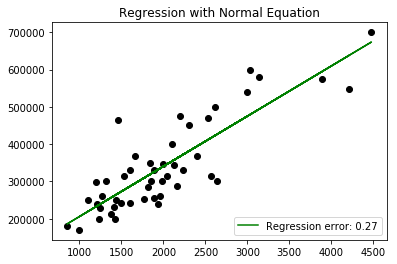

In [24]:
from sklearn import linear_model, preprocessing

data = loadtxt('house_x.dat')
Y_orig = loadtxt('house_y.dat').reshape(-1,1)

# Scaling data
Xscaler = preprocessing.StandardScaler().fit(data[:,0].reshape(-1,1))
X = atleast_2d(Xscaler.transform(data[:,0].reshape(-1,1)))
Yscaler = preprocessing.StandardScaler().fit(Y_orig)
Y = Yscaler.transform(Y_orig)

# regression with Normal equation
regression = linear_model.LinearRegression(fit_intercept=True).fit(X, Y) #(data, Y_orig)

plt.rcParams["figure.figsize"]=[6., 4.]
plt.scatter(Xscaler.inverse_transform(X), Yscaler.inverse_transform(Y), c='black')
plt.plot(Xscaler.inverse_transform(X), Yscaler.inverse_transform(regression.predict(X)), 
     color='green', label="Regression error: %.2f" % mean((regression.predict(X) - Y) ** 2))
plt.title('Regression with Normal Equation')
_ = plt.legend(loc='lower right')

Scikit-learn propose une implémentation efficace de la descente de gradient stochastique:

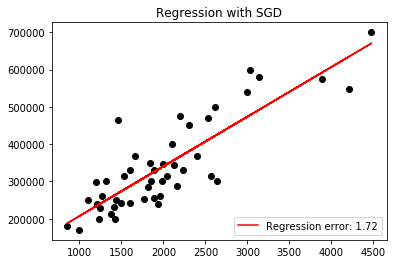

In [25]:
from sklearn.linear_model import SGDRegressor

stochastic_descent = SGDRegressor(alpha=0.01, max_iter=100).fit(X, ravel(Y))

plt.scatter(Xscaler.inverse_transform(X), Yscaler.inverse_transform(Y), c='black')
plt.plot(Xscaler.inverse_transform(X), 
         Yscaler.inverse_transform(stochastic_descent.predict(X)), 
         color='red', 
         label="Regression error: %.2f" % mean((stochastic_descent.predict(X) - Y) ** 2))
plt.title('Regression with SGD')
_ = plt.legend(loc='lower right')

La bibliothèque scikit-learn propose des implémentations performantes et faciles à utiliser des principaux algorithmes d'apprentissage automatique. Il est ainsi possible d'appliquer des normalisations et des traitements usuels sur les données en quelques lignes de calculs. Du point de vue performance, scikit-learn propose quand c'est possible des implémentations multiprocessus.